# **Imports**

In [1]:
#import tensorflow as tf
import sklearn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
from nltk.tokenize import RegexpTokenizer
import os
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
import numpy
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
import os
from google.colab import drive
drive.mount("/content/gdrive")
os.chdir('/content/gdrive/My Drive/Cables Palas/model')
import utils as utils
from utils import *

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Load data/features vector pre-procesed from this -->
[notebook](https://colab.research.google.com/drive/1jzXf7IkaFVdYyrG004UjScbkqJLZdXNp)**


*   load Normal cycles




In [0]:
url="normalPoints_PALA1_2018.csv" 
df = pd.read_csv(url)

In [0]:
df.drop('id',axis=1,inplace=True)


In [5]:
print(f"Normal count: {len(df)}")


Normal count: 8871




*   Load Anormal cycles 



In [0]:
url_abnormal="AnormalPoints_PALA1_2018.csv"
df_a=pd.read_csv(url_abnormal)

In [0]:
df_a.drop('id',axis=1,inplace=True)


In [8]:
print(f"Anormal count: {len(df_a)}")


Anormal count: 860


**This is the numeric feature vector, as it goes to the neural net**

In [0]:
x_normal = df.values
x_anomaly = df_a.values

In [0]:
x_normal_train, x_normal_test = train_test_split(
    x_normal, test_size=0.25, random_state=42)

# **Auto Encoders**
An auto encoder is a neural network that has the same number of input neurons as it does outputs.

In [11]:

from sklearn import metrics
#import numpy as np
#import pandas as pd
from IPython.display import display, HTML 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(25, input_dim=x_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(x_normal.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=100)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 6653 samples
Epoch 1/100
6653/6653 [==============================] - 10s 1ms/sample - loss: 0.0534
Epoch 2/100
6653/6653 [==============================] - 0s 57us/sample - loss: 0.0087
Epoch 3/100
6653/6653 [==============================] - 0s 61us/sample - loss: 0.0087
Epoch 4/100
6653/6653 [==============================] - 0s 61us/sample - loss: 0.0086
Epoch 5/100
6653/6653 [==============================] - 0s 59us/sample - loss: 0.0086
Epoch 6/100
6653/6653 [==============================] - 0s 58us/sample - loss: 0.0086
Epoch 7/100
6653/6653 [==============================] - 0s 62us/sample - loss: 0.0086
Epoch 8/100
6653/6653 [==============================] - 0s 55us/sample - loss: 0.0086
Epoch 9/100
6653/6653 [==============================] - 0s 56us/sample - loss: 0.0086
Epoch 10/100
6653/6653 [==============================] - 0s 64us/sample - loss: 0.0086
Epoch 11/100
6653/6653 [==

**Testing model**

In [12]:
pred = model.predict(x_normal_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_normal_test))
pred = model.predict(x_normal)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_normal))
pred = model.predict(x_anomaly)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_anomaly))
print(f"Insample Normal Score (RMSE): {score1}".format(score1))
print(f"Out of Sample Normal Score (RMSE): {score2}")
print(f"Anomaly Score (RMSE): {score3}")

Insample Normal Score (RMSE): 0.06935237779454187
Out of Sample Normal Score (RMSE): 0.0690931963794248
Anomaly Score (RMSE): 0.20860817557366318


# **Tuning autoencoder architectures** first

In [0]:
# Function to create model, required 


In [0]:
def create_model( nl1=1, nl2=1,  nl3=1, 
                 nn1=1000, nn2=500, nn3 = 200, l1=0.01, l2=0.01,
                act = 'relu', dropout=0, input_shape=1000, output_shape=20):
    '''This is a model generating function so that we can search over neural net 
    parameters and architecture'''
    
    #opt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999,  decay=decay)
    reg = keras.regularizers.l1_l2(l1=l1, l2=l2)
                                                     
    model = Sequential()
    
    # for the firt layer we need to specify the input dimensions
    first=True
    
    for i in range(nl1):
        if first:
            model.add(Dense(nn1, input_dim=input_shape, activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn1, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    for i in range(nl2):
        if first:
            model.add(Dense(nn2, input_dim=input_shape, activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn2, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    for i in range(nl3):
        if first:
            model.add(Dense(nn3, input_dim=input_shape, activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn3, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    model.add(Dense(output_shape, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [0]:
# model class to use in the scikit random search CV 
#from keras.wrappers.scikit_learn import KerasClassifier
model = KerasRegressor(build_fn=create_model, epochs=10, batch_size=40, verbose=1)

In [0]:
# learning algorithm parameters
#lr=[1e-2, 1e-3, 1e-4]
#decay=[1e-6,1e-9,0]

# activation
activation=['relu']

# numbers of layers
nl1 = [1,2]
nl2 = [1]
nl3 = [1,2]

# neurons in each layer as autoencoder
nn1=list(range(25,55,5))
nn2=list(range(4,14,2))
nn3=list(range(25,55,5))

# dropout and regularisation
dropout = [0]
l1 = [0,0.01]
l2 = [0]

# dictionary summary
param_grid = dict(
                    nl1=nl1, nl2=nl2, nl3=nl3, nn1=nn1, nn2=nn2, nn3=nn3,
                    act=activation, l1=l1, l2=l2, dropout=dropout, 
                    input_shape=[x_normal_train.shape[1]], output_shape = [x_normal_train.shape[1]],
                 )

In [21]:
results_random, estimator_random =search(model, param_grid, x_normal_train, x_normal_train, x_normal_test, x_normal_test, optimizer='random_search', n_iter=1)

Train on 5322 samples
Epoch 1/10
5322/5322 [==============================] - 7s 1ms/sample - loss: 0.0293
Epoch 2/10
5322/5322 [==============================] - 1s 128us/sample - loss: 0.0087
Epoch 3/10
5322/5322 [==============================] - 1s 149us/sample - loss: 0.0074
Epoch 4/10
5322/5322 [==============================] - 1s 133us/sample - loss: 0.0069
Epoch 5/10
5322/5322 [==============================] - 1s 129us/sample - loss: 0.0066
Epoch 6/10
5322/5322 [==============================] - 1s 130us/sample - loss: 0.0063
Epoch 7/10
5322/5322 [==============================] - 1s 133us/sample - loss: 0.0061
Epoch 8/10
5322/5322 [==============================] - 1s 131us/sample - loss: 0.0060
Epoch 9/10
5322/5322 [==============================] - 1s 130us/sample - loss: 0.0059
Epoch 10/10
1331/1331 [==============================] - 3s 2ms/sample
Train on 5322 samples
Epoch 1/10
5322/5322 [==============================] - 7s 1ms/sample - loss: 0.0329
Epoch 2/10
5322/532

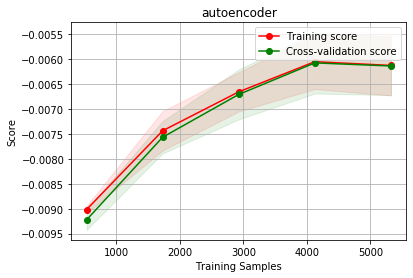

In [22]:
plot_learning_curve(estimator_random,'autoencoder', x_normal_train, x_normal_train, cv=5, n_jobs=-1)
plt.show() 